# Telco Case study

Telco is our customer. Telco is a telecommunications or communication service provider (CSP) company that transports information electronically through telephony and data communication services. Recently they've been noticing a lot of customer churn (loss of customers)

**The Data**

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

**What they want**

They would like you to Predict churn or whether or not the customer will churn. You can analyze all relevant customer data and develop focused customer retention programs.

**In addition**

They've also supplied us with a data set of 3 new customers and would like us to predict if the customers will churn or not.

# 1.Preparetion

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10] # sets default figure size

# 2.Load the Telco Customer Churn Dataset

We're going to load it from a link

In [24]:
# Load Telco Customer Churn dataset
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)
data = df
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 3.View the Data

In [6]:
# Let's view the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# 4.Data Preparation

In [25]:
# Remove customerID as it's not needed for modeling. Remember unique values like ID, social security number etc aren't features
data.drop(columns=['customerID'], inplace=True)

# Handle missing values - generally missing values throw errors so let's get rid of them
data = data.dropna()

data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 5.Encoding Categorical Variables

This is where we look at all categorical (object) variables and change them to be numeric. 

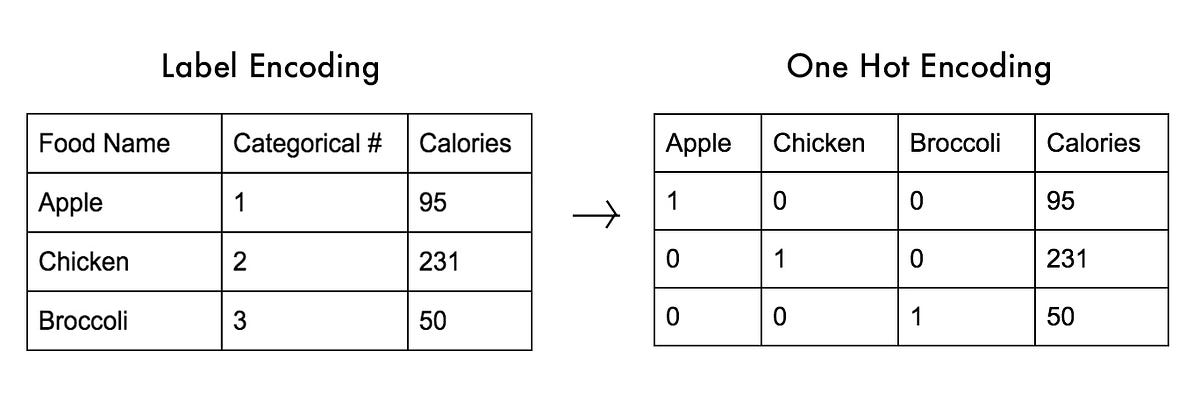

## Why do we encode variables

**Machine Learning Algorithms Require Numerical Input:**

Most machine learning algorithms, like regression and decision trees, are designed to work with numerical data. Categorical variables, which might have labels like red, green,blue, or low, medium, high, cannot be directly used as input. Encoding them into numerical values allows algorithms to process them effectively.

**Preventing Misinterpretation as Ordinal Data:**

If you have categorical data with an inherent order, such as low, medium, and high, using their raw labels can lead to incorrect interpretations. Encoding these labels as integers ensures that algorithms don't mistakenly treat the categories as having a meaningful numeric relationship.

**Creating Distinct Categories:**

Machine learning models treat numeric values differently than categorical labels. Example, if you have a feature with three categories (0, 1, and 2) and leave it as is, the model might assume a linear relationship between these categories. By using one-hot encoding or other categorical encodings, you create distinct binary features for each category, allowing the model to treat them as separate entities.

In [26]:
# Encode categorical variables using get_dummies
# remember, leave the numerical columns
categorical_cols = ['SeniorCitizen','gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
#drop_first=True  controls whether the first category of each categorical variable 
#should be dropped when creating the binary columns. For example, the Gender column has two options Male or Female
#When it's encoded, only one column gets created gender_Male because we know if gender_Male = 1, it's a Male and
#gender_Male = 0 it's a female so there is no need to create gender_Female column.

In [27]:
data.head()

,tenure,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_1,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,No,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.5,No,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,Yes,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,No,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,Yes,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [28]:
# let's make sure the data types are looking good
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7043 non-null   int64  
 1   MonthlyCharges                         7043 non-null   float64
 2   TotalCharges                           7043 non-null   object 
 3   Churn                                  7043 non-null   object 
 4   SeniorCitizen_1                        7043 non-null   uint8  
 5   gender_Male                            7043 non-null   uint8  
 6   Partner_Yes                            7043 non-null   uint8  
 7   Dependents_Yes                         7043 non-null   uint8  
 8   PhoneService_Yes                       7043 non-null   uint8  
 9   MultipleLines_No phone service         7043 non-null   uint8  
 10  MultipleLines_Yes                      7043 non-null   uint8  
 11  Inte

## What if I want to use LabelEncoder()?

Both LabelEncoder and pd.get_dummies are techniques used for converting categorical variables into numerical values, but they have different purposes and implications:

LabelEncoder:

- LabelEncoder is a technique from the sklearn.preprocessing module. It assigns a unique integer to each category present in a categorical variable.
- It's commonly used when there is some ordinal relationship or hierarchical meaning in the categories. For example, "low," "medium," and "high" can be encoded as 0, 1, and 2, respectively.
- However, using LabelEncoder with Decision Trees can lead to incorrect interpretations. Decision Trees may assume a natural order between the encoded values that doesn't necessarily exist in the data. This can lead to poor model performance and incorrect predictions.
- If used with caution and when appropriate (e.g., when the ordinal relationship is clear), LabelEncoder can save memory and reduce dimensionality compared to one-hot encoding.

pd.get_dummies:

- pd.get_dummies is a function from the pandas library. It performs one-hot encoding, which creates binary columns for each category in a categorical variable.
- One-hot encoding is suitable when there is no inherent order or relationship between categories. It treats each category independently.
- This approach avoids any potential pitfalls associated with the misinterpretation of ordinal values by Decision Trees. It's generally considered safer to use one-hot encoding when working with Decision Trees and other tree-based models.

### When to use LabelEncoder()?

The choice between using one-hot encoding and label encoding depends on the nature of the categorical variable and the machine learning algorithm you're using. Different algorithms handle categorical variables differently, and selecting the appropriate encoding method can impact the model's performance. 

**One-Hot Encoding:**

- Tree-Based Algorithms (Decision Trees, Random Forests, Gradient Boosting, etc.): Since these algorithms make decisions based on splits at specific feature values, they can naturally work with binary one-hot encoded features.

- Support Vector Machines (SVMs):
SVMs can work with one-hot encoded features, but they might require additional preprocessing to standardize feature scaling.

- Neural Networks:
Neural networks can work with one-hot encoded features, but they require careful preprocessing and may perform better with other encoding methods like embeddings.

**Label Encoding:**

- Ordinal Regression:
If the categorical variable has an inherent order, label encoding can be useful for ordinal regression tasks, where the order matters.

- Algorithms That Use Proximity Measures (K-Nearest Neighbors, Hierarchical Clustering, etc.):
These algorithms calculate distances or similarities between data points. If label-encoded categories have meaningful order or proximity, they can be useful in such cases.

- Linear Models (Logistic Regression, Linear Regression, etc.):
Linear models can work with label-encoded features, but they might assume a linear relationship between categories. If the categories don't have a meaningful order, one-hot encoding is generally preferred to prevent misinterpretation.

- Non-Tree Ensemble Methods (AdaBoost, Bagging, etc.):
Non-tree ensemble methods can work with label-encoded features, but their performance might be suboptimal compared to using one-hot encoding.

Remember that while these guidelines provide general suggestions

# 6. More Preparation

In [29]:
# TotalCharges is a variable, it should be numeric. So let's change that
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7043 non-null   int64  
 1   MonthlyCharges                         7043 non-null   float64
 2   TotalCharges                           7032 non-null   float64
 3   Churn                                  7043 non-null   object 
 4   SeniorCitizen_1                        7043 non-null   uint8  
 5   gender_Male                            7043 non-null   uint8  
 6   Partner_Yes                            7043 non-null   uint8  
 7   Dependents_Yes                         7043 non-null   uint8  
 8   PhoneService_Yes                       7043 non-null   uint8  
 9   MultipleLines_No phone service         7043 non-null   uint8  
 10  MultipleLines_Yes                      7043 non-null   uint8  
 11  Inte

In [31]:
# Let's check for nulls as they will throw errors
print(data.isnull().sum())

tenure                                    0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen_1                           0
gender_Male                               0
Partner_Yes                               0
Dependents_Yes                            0
PhoneService_Yes                          0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service           0
StreamingTV_Yes                 

TotalCharges has nulls, let's get rid of them before they create more issues. In this example, I am going to replace nulls with the mean if there are no values. I will do this for both MonthlyCharges and TotalCharges.

In [32]:
# Handle NaN Values
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)
data['MonthlyCharges'].fillna(data['MonthlyCharges'].mean(), inplace=True)

In [33]:
# Let's check again!
print(data.isnull().sum())

tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen_1                          0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMo

# 7.Define the features and target

Now our data set is clean. Ideally we want to do the following

Split our data into a test and training dataset.

Training Data: This is the portion of your dataset that you use to train or teach your machine learning model. It consists of both the input features (all your variables/column in the "data" dataframe other than churn (the variable you want to predict) and the corresponding known target values (churn). The model learns from the data, it looks at patterns, it creates the trees, makes the prediction and then looks at the answer (churn column).

Testing Data: This is a separate portion of your dataset that you don't use during training. After the model is trained, you use the test set to evaluate its performance and see how well it generalizes to new, unseen data. The model predicts the target values for the test set based on the features, and then you compare its predictions to the actual target values to assess its accuracy and other performance metrics.

In [41]:
# Define features and target
X = data.drop('Churn', axis=1) #all features other than our target variable
y = data['Churn'] # just our target variable
X

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen_1,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,1,1,1,1,0,1,...,0,1,0,1,1,0,1,0,0,1
7039,72,103.20,7362.90,0,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,0
7040,11,29.60,346.45,0,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
7041,4,74.40,306.60,1,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1


In [42]:
y #target variable

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [36]:
# this is just a list of my feature column names (remember this won't have our target variable this is just features that may affect the churn)
feature_cols = [c for c in X.columns]  
feature_cols

['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'SeniorCitizen_1',
 'gender_Male',
 'Partner_Yes',
 'Dependents_Yes',
 'PhoneService_Yes',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

# 8. Splitting the data 

We are splitting your data into training and testing sets:

- X_train: This will contain the feature values of the training data.
- X_test: This will contain the feature values of the testing data.
- y_train: This will contain the target labels of the training data.
- y_test: This will contain the target labels of the testing data.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_state is a parameter that you can use in various machine learning functions in libraries like scikit-learn to control the randomness or randomness seed. In our example, setting random_state to 42 ensures that the train-test split will be the same whenever this code is executed. We can choose any integer value for random_state, and as long as we use the same value, you'll get consistent results across different runs.

(Keep in mind that setting random_state is optional...)

# 9.Create and Fit Decision Tree Classifier object

In [45]:
# Create Decision Tree Classifier object
dtc = DecisionTreeClassifier(random_state=42)

# Train Decision Tree Classifier
dtc.fit(X_train, y_train)

# Predict churn on test data
y_pred = dtc.predict(X_test)

In [46]:
y_pred #just creates an array which corresponds to churn based on x_test

array(['Yes', 'Yes', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

# 10. Testing Accuracy

- By Confusion Matrix (this is often a good way to explain the accuracy to business stakeholders. Sometimes just giving a number may not really make them understand!)

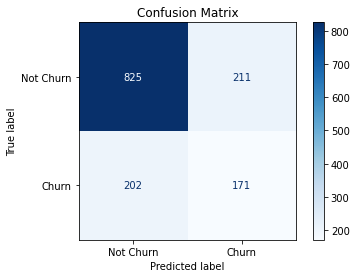

In [49]:
# Visualize the confusion matrix
# Uses answers from testing
plot_confusion_matrix(dtc, X_test, y_test, display_labels=['Not Churn', 'Churn'], cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

## So what does this mean for the confusion matrix

True Negative (TN) - 825 Value: This is the number of cases where the model correctly predicted that a customer would not churn (negative class) and the customer did not churn. 825 customers who were predicted not to churn and did not churn. Well done model!

False Positive (FP) - 211: This is the number of cases where the model incorrectly predicted that a customer would churn, but the customer did not churn. This is also known as a Type I error or a "false alarm." In this case, it's 211 customers who were predicted to churn but did not.

False Negative (FN) - 202: This is the number of cases where the model incorrectly predicted that a customer would not churn, but the customer actually did churn. This is also known as a Type II error or a "miss." In this case, it's 202 customers who were predicted not to churn but actually did. (This is the biggest issue to worry about especially in a case like churn)

True Positive (TP) - 171: This is the number of cases where the model correctly predicted that a customer would churn (positive class) and the customer actually did churn. In this case, it's 171 customers who were predicted to churn and indeed churned.



## Calculating accuracy

In [51]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7068843151171044

In [53]:
#This is actually calculated from the confusion matrix

# Given confusion matrix values manual calculation
TP = 171
TN = 825
FP = 211
FN = 202

# Calculate accuracy (all accurately predicted instances/total instances)
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.7068843151171044

## Classification Report

Can also do a classification report. It provides a summary of va
rious performance metrics for a classification model, such as precision, recall, and F1-score, along with other summary measures

In [71]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

          No       0.80      0.80      0.80      1036
         Yes       0.45      0.46      0.45       373

    accuracy                           0.71      1409
   macro avg       0.63      0.63      0.63      1409
weighted avg       0.71      0.71      0.71      1409



Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. In other words, it measures the accuracy of positive predictions. For class 0 (not churn), the precision is 0.85, which means that out of all instances predicted as class 0, 85% are actually class 0. For class 1 (churn), the precision is 0.70, indicating that 70% of instances predicted as class 1 are truly class 1.

Recall (Sensitivity): Recall is the ratio of correctly predicted positive observations to the total actual positives. It measures the model's ability to correctly predict positive instances. For class 0, the recall is 0.91, meaning that the model captures 91% of actual class 0 instances. For class 1, the recall is 0.56, indicating that the model identifies 56% of actual class 1 instances.

F1-Score: The F1-score is the weighted average of precision and recall. It's a measure that combines both precision and recall into a single value. It considers false positives and false negatives. The F1-score is used when there is some balance between precision and recall. For class 0, the F1-score is 0.88, and for class 1, it's 0.62.

Support: Support is the number of actual occurrences of the class in the specified dataset. In this case, there are 1036 instances of class 0 and 373 instances of class 1 in the test set.

Macro Avg: The macro average calculates the average precision, recall, and F1-score across both classes independently. In this case, the macro average precision is 0.77, recall is 0.74, and F1-score is 0.75.

Weighted Avg: The weighted average is similar to the macro average, but it takes into account the number of instances in each class. It's weighted by the support of each class. In this case, the weighted average precision is 0.81, recall is 0.82, and F1-score is 0.81.


# 11.Visualize the decision tree


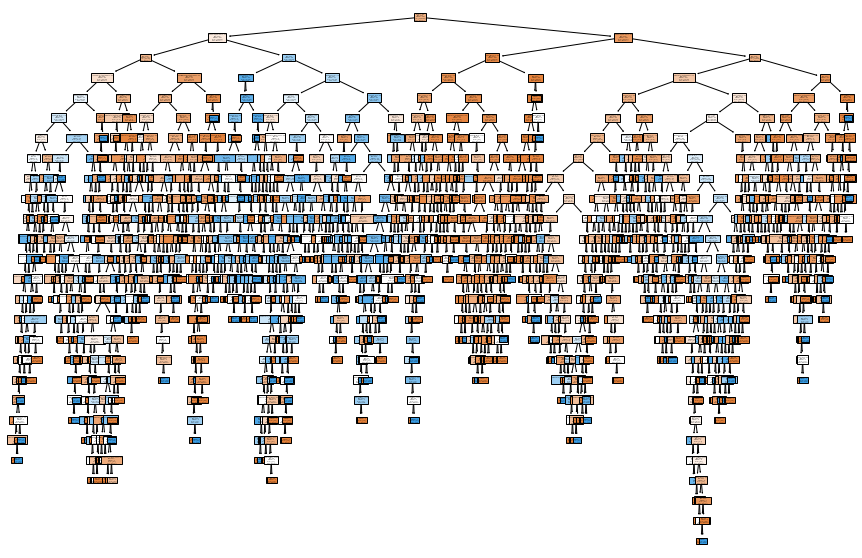

In [55]:
plt.figure(figsize=(15, 10)) 
plot_tree(dtc, feature_names=feature_cols, class_names=['Not Churn', 'Churn'], filled=True)
plt.show()

# 12.Feature Importance

Sometimes it's good to see what features are the most important.

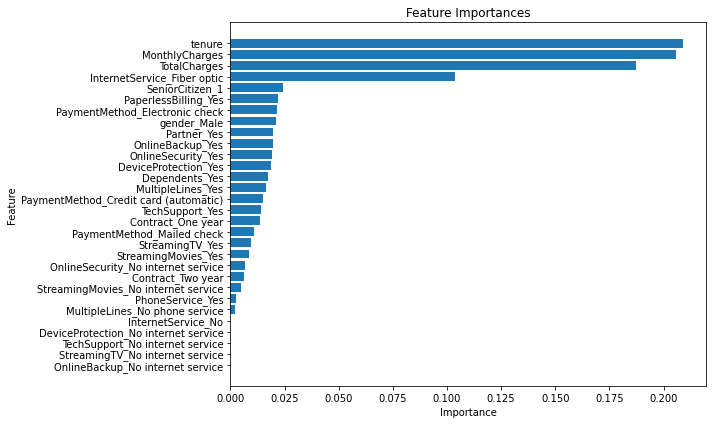

In [58]:
# Extract feature importances
feature_importances = dtc.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_cols, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()



This is interesting! Note the following:

- Features with higher importance values have a stronger impact on the model's decisions, meaning they contribute more to separating and classifying the target classes (in your case, "Churn" and "Not Churn").

- Features with lower or zero importance values have less influence on the model's decisions. Features with zero importance might indicate that the feature didn't contribute much to the decision tree's splits and is not relevant for classifying the target. 

- The sum of all importance values is equal to 1, representing the entirety of the importance distribution among the features.

**The importance values of features in a decision tree reflect their contribution to the model's ability to make accurate predictions, but they don't directly indicate the direction of the relationship between the feature and the target variable. In other words, a higher importance value doesn't necessarily mean that higher values of the feature lead to a better case of churn.**

# 13.Predicting new data coming in

#Now we have new data coming in. We have 3 more customers and Telco wants to know the probability of churn


In [64]:
# New data
new_data_df = pd.read_excel("new_customer_data.xlsx")

# Remove customerID as it's not needed for modeling
new_data_df.drop(columns=['CustomerID'], inplace=True)

# Encode categorical variables in the new data
new_data_encoded = pd.get_dummies(new_data_df, columns=categorical_cols, drop_first=True)

Now the new data may have less encoded columns that the old data.
i.e if only females are present in the new data, the encoding won't create a gender_Male column in the new data as it doesn't exist

Ensure the encoded new data has the same columns as the training data
What the below does is creates a list of columns not present in the new data but present in the old data (X).
Missing columns are created in the new_data_encoded dataframe and values are defaulted to 0

In [62]:
X.info() #all encoded columns in the old model so 30 columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7043 non-null   int64  
 1   MonthlyCharges                         7043 non-null   float64
 2   TotalCharges                           7043 non-null   float64
 3   SeniorCitizen_1                        7043 non-null   uint8  
 4   gender_Male                            7043 non-null   uint8  
 5   Partner_Yes                            7043 non-null   uint8  
 6   Dependents_Yes                         7043 non-null   uint8  
 7   PhoneService_Yes                       7043 non-null   uint8  
 8   MultipleLines_No phone service         7043 non-null   uint8  
 9   MultipleLines_Yes                      7043 non-null   uint8  
 10  InternetService_Fiber optic            7043 non-null   uint8  
 11  Inte

In [66]:
new_data_encoded.info() #only 18 columns!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tenure                          3 non-null      int64  
 1   MonthlyCharges                  3 non-null      float64
 2   TotalCharges                    3 non-null      float64
 3   SeniorCitizen_1                 3 non-null      uint8  
 4   gender_Male                     3 non-null      uint8  
 5   Partner_Yes                     3 non-null      uint8  
 6   Dependents_Yes                  3 non-null      uint8  
 7   MultipleLines_Yes               3 non-null      uint8  
 8   InternetService_No              3 non-null      uint8  
 9   OnlineSecurity_Yes              3 non-null      uint8  
 10  OnlineBackup_Yes                3 non-null      uint8  
 11  DeviceProtection_Yes            3 non-null      uint8  
 12  TechSupport_Yes                 3 non-nu

In [67]:
missing_cols = set(X.columns) - set(new_data_encoded.columns) #this gives a list of columns missing in the new data but present in the old data
missing_cols

{'Contract_Two year',
 'DeviceProtection_No internet service',
 'InternetService_Fiber optic',
 'MultipleLines_No phone service',
 'OnlineBackup_No internet service',
 'OnlineSecurity_No internet service',
 'PaperlessBilling_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PhoneService_Yes',
 'StreamingMovies_No internet service',
 'StreamingTV_No internet service',
 'TechSupport_No internet service'}

In [68]:
for col in missing_cols:
    new_data_encoded[col] = 0  # This Add missing columns with default value 0

In [69]:
# Use the trained decision tree model to make predictions
new_predictions = dtc.predict(new_data_encoded)

In [70]:
#add the prediction column to the new_data_df

new_data_df['is_Churn Prediction'] = new_predictions
new_data_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,is_Churn Prediction
0,Male,0,Yes,No,20,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,75.50,1801.9,No
1,Male,1,No,No,1,Yes,Yes,No,No,No,No,No,No,Yes,Month-to-month,Yes,Mailed check,83.25,825.4,Yes
2,Female,0,Yes,Yes,50,Yes,No,No,Yes,Yes,Yes,Yes,Yes,No,One year,Yes,Bank transfer (automatic),20.00,61.9,No


# 14.Extra: Pruning

Pruning is a technique used in decision tree algorithms to prevent overfitting and improve the generalization ability of the model. 

In [72]:
#You can prune the tree at this stage when we create the decision tree classifier 
#(feel free to go back to cell 45 and input a max_depth = 5 and let's see how it affects accuracy)

dtc = DecisionTreeClassifier(max_depth=5, random_state=42)  # Adjust max_depth as needed
# Train Decision Tree Classifier
dtc.fit(X_train, y_train)

# Predict churn on test data
y_pred = dtc.predict(X_test)

# Evaluate the model
accuracy_pruning = accuracy_score(y_test, y_pred)
accuracy_pruning

0.8062455642299503

Increasing your accuracy from 70% to 80% by adjusting the max_depth parameter of our decision tree model is a positive sign. It suggests that the decision tree was likely overfitting the training data before and that reducing the depth of the tree helped to improve its generalization ability!

# Logistic Regression Example



TotalCharges      11
MonthlyCharges     0
dtype: int64
Accuracy: 0.8168914123491838
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



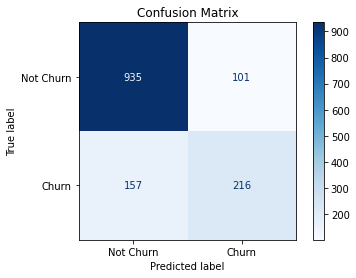

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Telco Customer Churn dataset
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

# Data preparation
df.drop(columns=['customerID'], inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for NaN Values
print(df[['TotalCharges', 'MonthlyCharges']].isnull().sum())

# Handly NaN Values
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)
df['MonthlyCharges'].fillna(df['MonthlyCharges'].mean(), inplace=True)
  # Convert TotalCharges to numeric

# One-hot encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define the features and target column
target_col = 'Churn_Yes'
feature_cols = [c for c in df_encoded.columns if c != target_col]

# Create X and y
X = df_encoded[feature_cols]
y = df_encoded[target_col]

# Split the data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42) #can increase max_iter here  as logreg = LogisticRegression(max_iter=1000, random_state=42)

 
# Train Logistic Regression model
logreg.fit(X_train, y_train)

# Predict churn on test data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

# Visualize the confusion matrix
plot_confusion_matrix(logreg, X_test, y_test, display_labels=['Not Churn', 'Churn'], cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

